In [17]:
#Importing necessary libraries 

import numpy as np
import pandas as pd  
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Step 1
#### For each feature, randomly select the range (a1,b1), (a2,b2), …. (a5, b5). Their midpoints are c1,c2,c3,c4,c5.

In [18]:
#Making a 5D dataset. I.e. 5 features and 1 target variable
#each feature is a real number


feature_names = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']
df = pd.DataFrame(columns=feature_names)

#randomly selecting the range of values for each feature (a,b) where a<b
range_of_features = []
for i in range(5):
    range_of_features.append([np.random.randint(1,1000),np.random.randint(1,1000)])
    if range_of_features[i][0] > range_of_features[i][1]:
        range_of_features[i][0], range_of_features[i][1] = range_of_features[i][1], range_of_features[i][0]

#midpoint of each feature range
midpoints = []
for i in range(5):
    midpoints.append((range_of_features[i][0] + range_of_features[i][1])/2)

# Step 2
#### Out of these 5, randomly choose 2 features (let’s say i and j) as “important”.

In [19]:
#randomly choosing two features i and j as important features
i_impt = np.random.randint(0,5)
j_impt = np.random.randint(0,5)
#making sure i and j are not same
while i_impt == j_impt:
    j_impt = np.random.randint(0,5)

# Step 3
#### generate 1000 datapoints according to the following rule

In [20]:
#generating 1000 datapoints
"""
For each feature, generate value uniformly between the range (a,b), 
I.e. x1 from (a1,b1), x2 from (a2,b2) etc. 
This way, you get feature vector x=[x1 x2 x3 x4 x5] for that datapoint.
"""
# Didn't understand if the feature generation should be uniform as in equally spaced or randomly chosen uniformly. 
# Making both versions for now.


'\nFor each feature, generate value uniformly between the range (a,b), \nI.e. x1 from (a1,b1), x2 from (a2,b2) etc. \nThis way, you get feature vector x=[x1 x2 x3 x4 x5] for that datapoint.\n'

In [21]:

# equally spaced version
x = []
for i in range(5): 
    x.append(np.linspace(range_of_features[i][0], range_of_features[i][1], 1000))

print(x[0][0:10])

print(len(x))
print(len(x[0]))
datapoints = x
#now x is a list of 5 lists, each of length 1000
#making it a list of 1000 lists, each of length 5 by transposing
# datapoints = np.array(x).T.tolist()
# print(len(datapoints))
# print(len(datapoints[0]))
# print(datapoints[0])

[463.         463.04804805 463.0960961  463.14414414 463.19219219
 463.24024024 463.28828829 463.33633634 463.38438438 463.43243243]
5
1000


In [6]:
# randomly chosen uniformly version
x = []
for i in range(5): 
    x.append(np.random.uniform(range_of_features[i][0], range_of_features[i][1], 1000))

print(len(x))
print(len(x[0]))
datapoints = x
#now x is a list of 5 lists, each of length 1000
#making it a list of 1000 lists, each of length 5 by transposing
# datapoints = np.array(x).T.tolist()
# print(len(datapoints))
# print(len(datapoints[0]))


5
1000


In [22]:
#setting the datapoints as the features in the dataframe
for i in range(5):
    df[feature_names[i]] = datapoints[i]

df.head()
print(df.size)
print(len(df))
print(df[feature_names[3]][5])


5000
1000
113.09009009009009


# Step 4
#### let’s say the “important features” (chosen earlier) are xi and xj. If xi > ci and xj >cj, then set the label of this datapoint as y=1 with probability 0.8, and y=0 with probability 0.2. But if xi < ci and xj < cj, then set the label of this datapoint as y=1 with probability 0.2, and y=0 with probability 0.8. Otherwise, set the label of this datapoint as y=1 with probability 0.5, and y=0 with probability 0.5.

In [23]:
#setting the labels for the datapoints
labels = []
for i in range(len(df)):
    if df[feature_names[i_impt]][i] > midpoints[i_impt] and df[feature_names[j_impt]][i] > midpoints[j_impt]:
        #If xi > ci and xj >cj, then set the label of this datapoint as y=1 with probability 0.8, and y=0 with probability 0.2
        if np.random.random() < 0.8:
            labels.append(1)
        else:
            labels.append(0)
    elif df[feature_names[i_impt]][i] < midpoints[i_impt] and df[feature_names[j_impt]][i] < midpoints[j_impt]:
        #If xi < ci and xj < cj, then set the label of this datapoint as y=0 with probability 0.8, and y=1 with probability 0.2
        if np.random.random() < 0.8:
            labels.append(0)
        else:
            labels.append(1)
    else:
        #If xi > ci and xj < cj, or xi < ci and xj > cj, then set the label of this datapoint as y=0 with probability 0.5, and y=1 with probability 0.5
        if np.random.random() < 0.5:
            labels.append(0)
        else:
            labels.append(1)

#setting the labels as the target variable in the dataframe
df['target'] = labels
df.head()
        
    

,feature1,feature2,feature3,feature4,feature5,target
0,463.000000,287.000000,723.000000,113.000000,71.000000,0
1,463.048048,287.341341,723.104104,113.018018,71.448448,0
2,463.096096,287.682683,723.208208,113.036036,71.896897,0
3,463.144144,288.024024,723.312312,113.054054,72.345345,0
4,463.192192,288.365365,723.416416,113.072072,72.793794,0


In [24]:
print(len(labels))
print(len(datapoints))

1000
5


# Step 5

#### <ul><li>Randomly divide the dataset into training (80%) and testing (20%) sets</li> <li>Run Decision Tree using the library functions and report test accuracy.</li> <li>Visualize the tree.</li></ul>

In [25]:
# Split the given data into 80 percent training data and 20 percent testing data
X = df[feature_names]
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
# Create Decision Tree classifer object
Tree = DecisionTreeClassifier(criterion = "entropy", max_depth =4)

# Fit the generated data into the model
Tree = Tree.fit(x_train, y_train)

In [27]:
# Predict the response for test dataset
y_pred = Tree.predict(x_test)

In [28]:
# percentage of accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.76


It is currently giving an accuracy of 65-70 % accuracy each time for equally distributed case and 60-70 % accuracy for uniformly random case. This is probably supposed to happen because, probablity of 0.5 case may be dominating the dataset since the chance of this being generated randomly is 50%.

<b> 0.8 * 50% + 0.5 * 50% = 65 % </b>

which is around the answer we are getting.

In [15]:
# confusion matrix
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix: [[90 20]
 [51 39]]


[Text(0.5, 0.9, 'X[4] <= 599.776\nentropy = 0.999\nsamples = 800\nvalue = [414, 386]'),
 Text(0.25, 0.7, 'X[2] <= 269.794\nentropy = 0.904\nsamples = 407\nvalue = [277, 130]'),
 Text(0.125, 0.5, 'X[2] <= 107.467\nentropy = 0.621\nsamples = 207\nvalue = [175, 32]'),
 Text(0.0625, 0.3, 'X[2] <= 106.416\nentropy = 0.835\nsamples = 64\nvalue = [47, 17]'),
 Text(0.03125, 0.1, 'entropy = 0.798\nsamples = 62\nvalue = [47, 15]'),
 Text(0.09375, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1875, 0.3, 'X[2] <= 139.104\nentropy = 0.484\nsamples = 143\nvalue = [128, 15]'),
 Text(0.15625, 0.1, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.21875, 0.1, 'entropy = 0.575\nsamples = 110\nvalue = [95, 15]'),
 Text(0.375, 0.5, 'X[2] <= 487.699\nentropy = 1.0\nsamples = 200\nvalue = [102, 98]'),
 Text(0.3125, 0.3, 'X[2] <= 481.448\nentropy = 0.997\nsamples = 188\nvalue = [100, 88]'),
 Text(0.28125, 0.1, 'entropy = 0.999\nsamples = 182\nvalue = [94, 88]'),
 Text(0.34375, 0.1, 'entr

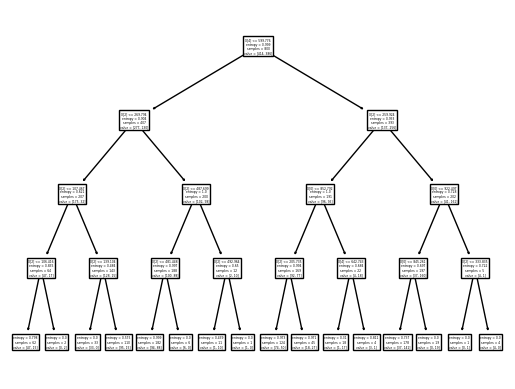

In [16]:
# Plot the decision tree
tree.plot_tree(Tree)

Seems like our tree is overfitting

In [31]:
from sklearn.tree import export_text
r = export_text(Tree, feature_names=feature_names)
print(r)

|--- feature3 <= 773.54
|   |--- feature4 <= 121.50
|   |   |--- feature1 <= 484.07
|   |   |   |--- feature3 <= 767.92
|   |   |   |   |--- class: 0
|   |   |   |--- feature3 >  767.92
|   |   |   |   |--- class: 0
|   |   |--- feature1 >  484.07
|   |   |   |--- feature4 <= 121.35
|   |   |   |   |--- class: 0
|   |   |   |--- feature4 >  121.35
|   |   |   |   |--- class: 0
|   |--- feature4 >  121.50
|   |   |--- class: 0
|--- feature3 >  773.54
|   |--- feature2 <= 455.62
|   |   |--- class: 1
|   |--- feature2 >  455.62
|   |   |--- feature3 <= 774.69
|   |   |   |--- class: 0
|   |   |--- feature3 >  774.69
|   |   |   |--- feature1 <= 499.97
|   |   |   |   |--- class: 1
|   |   |   |--- feature1 >  499.97
|   |   |   |   |--- class: 1

